In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('product_sales.csv')

In [3]:
data['sales_method'] = data['sales_method'].str.lower().replace({
    'email + call': 'email + call',
    'em + call': 'email + call',  # Assumes 'em + call' should be 'Email + Call'
    'email': 'email',
    'call': 'call'
})

In [4]:
data['revenue'].fillna(0, inplace=True)

In [5]:
data = data.drop_duplicates()

In [6]:
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')

In [7]:
data.info()
data['sales_method'].value_counts()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [8]:
customer_lifetime_value = data.groupby('customer_id')['revenue'].sum()

In [10]:
customer_counts = data.groupby('sales_method')['customer_id'].nunique()
print("Customer Counts by Sales Method:\n", customer_counts)

Customer Counts by Sales Method:
 sales_method
call            4962
email           7466
email + call    2572
Name: customer_id, dtype: int64


In [11]:
# Overall revenue spread
revenue_overall_summary = data['revenue'].describe()
print("Overall Revenue Spread:\n", revenue_overall_summary)

# Revenue spread by sales method
revenue_by_method_summary = data.groupby('sales_method')['revenue'].describe()
print("\nRevenue Spread by Sales Method:\n", revenue_by_method_summary)

Overall Revenue Spread:
 count    15000.000000
mean        87.209201
std         51.725970
min          0.000000
25%         50.600000
50%         87.575000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64

Revenue Spread by Sales Method:
                count        mean        std  min       25%      50%      75%  \
sales_method                                                                   
call          4962.0   45.861243  12.290939  0.0   41.0900   45.470   52.590   
email         7466.0   90.050607  27.457181  0.0   86.5000   94.275  104.460   
email + call  2572.0  158.731217  68.470245  0.0  149.8225  182.135  189.535   

                 max  
sales_method          
call           71.36  
email         148.97  
email + call  238.32  


In [13]:
weekly_revenue_by_method = data.groupby(['week', 'sales_method'])['revenue'].mean().unstack()
print("Weekly Revenue by Sales Method:\n", weekly_revenue_by_method.head(10))  

Weekly Revenue by Sales Method:
 sales_method       call       email  email + call
week                                             
1             34.510792   81.621865    114.090068
2             41.977665   92.793789    131.881150
3             40.185443   85.906209    135.758050
4             49.347254  100.268251    158.174141
5             51.262557  100.098856    161.130521
6             63.064554  120.338832    190.655352


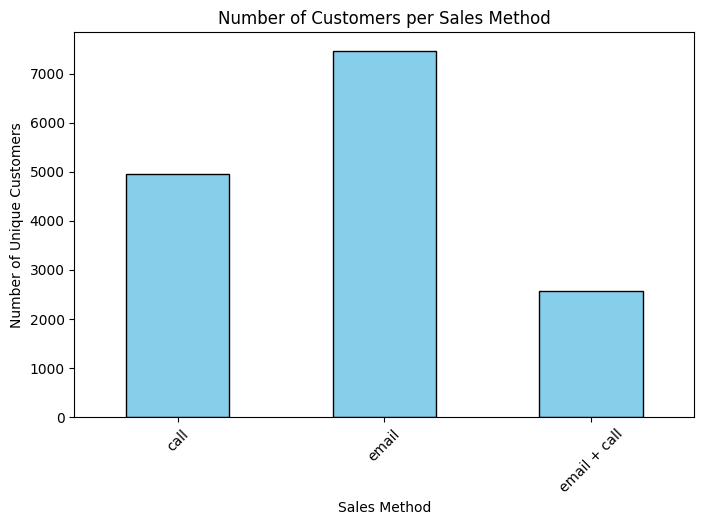

In [14]:
plt.figure(figsize=(8, 5))
customer_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Customers per Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

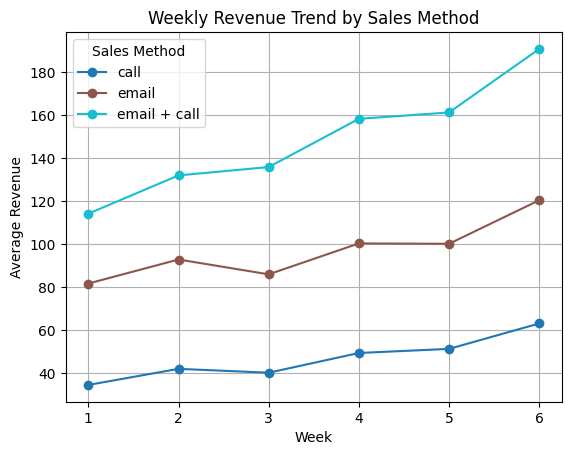

In [15]:
plt.figure(figsize=(12, 6))
weekly_revenue_by_method.plot(marker='o', linestyle='-', colormap='tab10')
plt.title('Weekly Revenue Trend by Sales Method')
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.legend(title='Sales Method')
plt.grid(True)
plt.show()

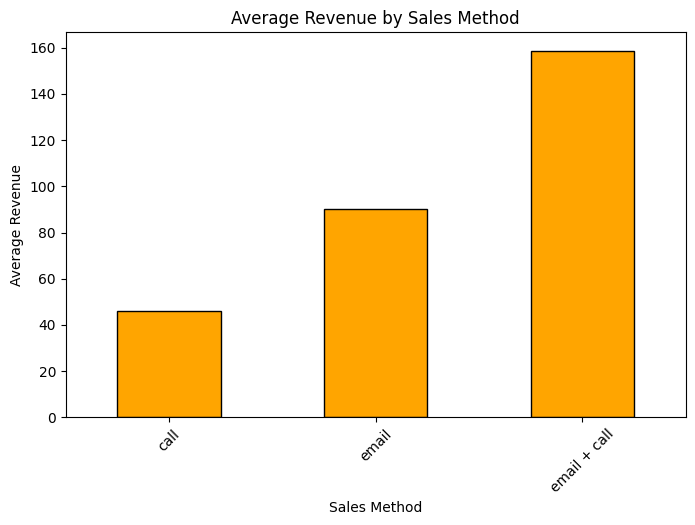

In [16]:
avg_revenue_by_method = data.groupby('sales_method')['revenue'].mean()

plt.figure(figsize=(8, 5))
avg_revenue_by_method.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()